# Imaging

In this notebook we will look at some of the imaging from SXDS and test displaying it.

In [203]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.table import Table

# Read in the three test images downloaded from here:
g_name = ('../../dmu0/dmu0_HSC/data/hsc-release.mtk.nao.ac.jp/archive/filetree/'
    +'pdr2_dud/deepCoadd-results/HSC-G/8524/3,5/calexp-HSC-G-8524-3,5.fits')
r_name = (
    '../../dmu0/dmu0_HSC/data/hsc-release.mtk.nao.ac.jp/archive/filetree/'
    'pdr2_dud/deepCoadd-results/HSC-R/8524/3,5/calexp-HSC-R-8524-3,5.fits')
i_name = (
    '../../dmu0/dmu0_HSC/data/hsc-release.mtk.nao.ac.jp/archive/filetree/'
    'pdr2_dud/deepCoadd-results/HSC-I/8524/3,5/calexp-HSC-I-8524-3,5.fits')
ks_name = ('../../dmu4/dmu4_SXDS/data/3,5.fits')
g = fits.open(g_name)[1].data
r = fits.open(r_name)[1].data
i = fits.open(i_name)[1].data
ks = fits.open(ks_name)[1].data



In [19]:
from astropy.coordinates import SkyCoord
import astropy.units as u

#We are using a rings skymap
from lsst.geom import SpherePoint 
from lsst.geom import degrees
from lsst.skymap.ringsSkyMap import RingsSkyMap, RingsSkyMapConfig

config = RingsSkyMapConfig()
#These config options are chose to be the same as HSC:
#https://github.com/lsst/obs_subaru/blob/master/config/hsc/makeSkyMap.py
config.numRings = 120
config.projection = "TAN"
config.tractOverlap = 1.0/60 
config.pixelScale = 0.168
sm = RingsSkyMap(config)

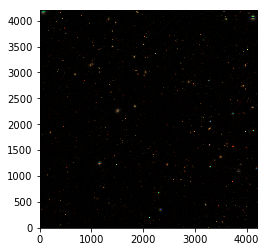

In [4]:
rgb_default = make_lupton_rgb(i, r, g, filename="./figs/8524_3,5_irg.jpeg")
plt.imshow(rgb_default, origin='lower')

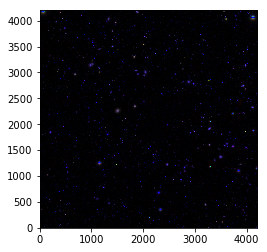

In [5]:
rgb_default = make_lupton_rgb(i, r, ks, filename="./figs/8524_3,5_irks.jpeg")
plt.imshow(rgb_default, origin='lower')

In [220]:
# high z candidates from Bowler et al.
#https://academic.oup.com/mnras/article/466/3/3612/2726590?login=true
cands = [
    ['UDS-35314',  '02:19:09.49',  '-05:23:20.6', 'Bowler (O16) P'],
    ['UDS-118717', '02:18:11.50',  '-05:00:59.4', 'Bowler (O17) P'],
    ['UDS-88759',  '02:17:57.58',  '-05:08:44.8', 'CANDELS L'],
]

In [221]:
cands_tab = Table(np.array(cands))
cands_tab['col0'].name='id'
cands_tab['col1'].name='ra_sex'
cands_tab['col2'].name='dec_sex'
cands_tab['col3'].name='source'
cands_tab['ra']=np.full(len(cands_tab),np.nan)
cands_tab['dec']=np.full(len(cands_tab),np.nan)
cands_tab['tract']=np.full(len(cands_tab),0)
cands_tab['patch']=np.full(len(cands_tab),'   ')

In [226]:
#get patches
patch_list = []
for cand in cands_tab:
    sex='{} {}'.format(cand['ra_sex'],cand['dec_sex'])
    c = SkyCoord(sex, unit=(u.hourangle, u.deg))
    patchInfo=sm.findTractPatchList(
        [lsst.geom.SpherePoint(c.ra.degree*lsst.geom.degrees, c.dec.degree*lsst.geom.degrees)]
        )
    patch_list.append([patchInfo[0][0].getId(),patchInfo[0][1][0].getIndex()])
    cand['ra']=c.ra.radian
    cand['dec']=c.dec.radian
    cand['tract']=patchInfo[0][0].getId()
    cand['patch']='{},{}'.format(patchInfo[0][1][0].getIndex()[0],patchInfo[0][1][0].getIndex()[1])
   
    

In [276]:

new_cands=[
    #ra.     dec             notes.    from Manda email 20210326
    [36.685,  -4.995, 'JKCS 041 z1.9'], #https://arxiv.org/pdf/1311.4361.pdf
    [34.115875, -4.9261388, 'Redshift = 6.01 quasar'],
]
#https://arxiv.org/pdf/1111.2726.pdf Extremely red galaxies
tabtext="""06165 34.43191 -5.48688 2.511 0.786 2.553
79102 34.14750 -4.77846 2.535 0.920 2.355
25371 34.73086 -5.29274 2.536 0.834 2.238
01559 34.40150 -5.53476 2.540 0.655 2.511
40812* 34.17666 -5.13515 2.565 0.771 2.716
08303* 34.29894 -5.46366 2.581 0.770 2.536
24756 34.73077 -5.29849 2.668 0.797 2.665
65143 34.40916 -4.91072 2.688 0.904 2.173
78891 34.59163 -4.78038 2.705 0.583 2.360
51547 34.90864 -5.03568 2.729 0.689 2.684
39991* 34.73174 -5.14295 2.754 0.888 2.574
11488 34.64674 -5.43199 2.813 0.868 2.712
85772 34.38530 -4.71782 2.852 0.583 2.487
28153 34.28822 -5.26259 2.889 0.395 2.043
28841* 34.14779 -5.25500 2.896 0.798 2.716
44569 34.42194 -5.10082 2.948 0.544 1.758
10585 34.79973 -5.44024 3.033 1.060 2.394
26888 34.24049 -5.27663 3.112 0.658 2.430
14598* 34.68966 -5.40086 3.287 0.680 2.744
93574* 34.28374 -4.63816 3.744 0.705 2.309
"""
tab=Table(names=['id','ra','dec','z','b_v','t_obs'])
tab['id'] = tab['id'].astype(str)
for line in tabtext.splitlines():
    line = line.split(' ')
    tab.add_row(line)

for cand in new_cands:
    tab.add_row([cand[2],cand[0],cand[1],np.nan,np.nan,np.nan])

In [285]:
patches =set()
for cand in tab:
    
    c=SkyCoord(cand['ra'],cand['dec'], unit=(u.deg))
    #ra,dec= c.ra.degree,c.dec.degree

    patchInfo=sm.findTractPatchList(
            [lsst.geom.SpherePoint(c.ra.degree*lsst.geom.degrees, c.dec.degree*lsst.geom.degrees)]
            )
    tract=patchInfo[0][0].getId()
    patch="{},{}".format(patchInfo[0][1][0].getIndex()[0],patchInfo[0][1][0].getIndex()[1])
    patches.add(patch)
    print(c.ra.degree,c.dec.degree, tract,patch)
    #                   id, ra_sex, 
    cands_tab.add_row([cand['id'],'','','',c.ra.radian,c.dec.radian,tract,patch])
    
print(patches)

34.43191 -5.48688 8523 3,2
34.1475 -4.77846 8523 4,6
34.73086 -5.29274 8523 1,4
34.4015 -5.53476 8523 3,2
34.17666 -5.13515 8523 4,4
34.29894 -5.46366 8523 4,3
34.73077 -5.29849 8523 1,3
34.40916 -4.91072 8523 3,6
34.59163 -4.78038 8523 2,6
34.90864 -5.03568 8523 0,5
34.73174 -5.14295 8523 1,4
34.64674 -5.43199 8523 2,3
34.3853 -4.71782 8523 3,7
34.28822 -5.26259 8523 4,4
34.14779 -5.255 8523 4,4
34.42194 -5.10082 8523 3,5
34.79973 -5.44024 8523 1,3
34.24049 -5.27663 8523 4,4
34.68966 -5.40086 8523 1,3
34.28374 -4.63816 8523 4,7
36.685 -4.995 8525 7,5
34.115875 -4.9261388 8523 5,5
{'5,5', '7,5', '3,2', '4,3', '1,4', '2,6', '0,5', '4,6', '1,3', '3,6', '2,3', '4,7', '4,4', '3,5', '3,7'}


In [286]:
cands_tab

id,ra_sex,dec_sex,source,ra,dec,tract,patch
str22,str14,str14,str14,float64,float64,int64,str3
UDS-35314,02:19:09.49,-05:23:20.6,Bowler (O16) P,0.607192047343089,-0.09405676301733665,8523,"1,3"
UDS-118717,02:18:11.50,-05:00:59.4,Bowler (O17) P,0.6029748955379575,-0.08755444192629554,8523,"2,5"
UDS-88759,02:17:57.58,-05:08:44.8,CANDELS L,0.6019626045718008,-0.08981076479817933,8523,"3,4"
06165,,,,0.6009501972503608,-0.09576412166182648,8523,"3,2"
79102,,,,0.5959863063247637,-0.08339986017484824,8523,"4,6"
25371,,,,0.6061678590491978,-0.09237573945200468,8523,"1,4"
01559,,,,0.6004194426248293,-0.09659978530768136,8523,"3,2"
40812*,,,,0.5964952443346452,-0.08962527508378682,8523,"4,4"
08303*,,,,0.598629432943984,-0.09535885620951338,8523,"4,3"


In [294]:
cands_tab.write('./data/highz_cands.fits',overwrite=True)

In [293]:

with open('./data/copy_patches.sh', 'w') as the_file:
    the_file.write('#!/bin/bash\n')
    the_file.write('# Copy the patches we want\n')
    the_file.write('mkdir highz\n')
    for cand in cands_tab:
        
        the_file.write(
            ('cp ../../../dmu4/dmu4_SXDS/data/rerun/coaddPhot/deepCoadd-results/'
             +'*/{tract}/{patch}/calexp*.fits ./highz/\n').format(
                tract=cand['tract'],patch=cand['patch']
            )
        )
    the_file.write('tar -czvf highz.tar.gz highz\n')


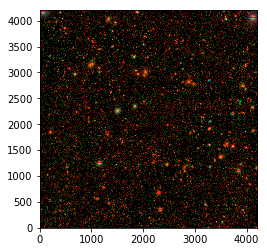

In [141]:
rgb_default = make_lupton_rgb(ks, i, g, Q=10, stretch=0.5, filename="./figs/8524_3,5_ksig.jpeg")
plt.imshow(rgb_default, origin='lower')

In [ ]:
cands

In [72]:
hsc_bands=['HSC-{}'.format(b.upper()) for b in 'grizy']
vista_bands=['VISTA-{}'.format(b.replace('K','Ks')) for b in 'ZYJHK']
all_bands = hsc_bands+vista_bands
all_bands

['HSC-G',
 'HSC-R',
 'HSC-I',
 'HSC-Z',
 'HSC-Y',
 'VISTA-Z',
 'VISTA-Y',
 'VISTA-J',
 'VISTA-H',
 'VISTA-Ks']

In [71]:
#for cand in cands:
    #open figuire
    
    #for band in all_bands:
        #open file
        
        #cut region
        
        #plot figure
    
    #save figure
    

['VISTA-Z', 'VISTA-Y', 'VISTA-J', 'VISTA-H', 'VISTA-Ks']

In [178]:
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u
from astropy.wcs import WCS
import astropy.io.fits as fits
from astropy.table import Table
import os
import numpy as np
#import warnings
#warnings.filterwarnings("ignore")
import scipy.ndimage as ndimage
def rd_fits(filename, ra, dec, hdrNum=1, width_as=20., pixelscale=None, hdrKey_pixelscale=None, 
            hdr_pix_scale_unit = u.arcsec, smooth=False,write=False):
    """
    Read fits image and create cutout of size width_as
    """
    ## read fits
    if os.path.exists(filename) or urlfile_exists(filename):
        #print("     fits file available")
        h = fits.open(filename, cache=False)
        if hdrNum is not None:
            hdr = h[hdrNum].header 
            data = h[hdrNum].data
        else:
            # CFHT multi-extension files
            print("     len(hdulist):", len(h))
            for hnum in range(len(h)):
                print("     hdrNum:", hnum)
                data_hnum = h[hnum].data
                if data_hnum is not None and np.nanmean(data_hnum) !=0:
                    hdr = h[hnum].header
                    data = data_hnum
                    if "NAXIS3" in hdr:
                        data = data[0]          
                    break
        h.close()
            
        try:
            w = WCS(hdr, naxis = 2)
        except:    
            # HST fits: crop header (to prevent issue with WCS)
            if "D001VER" in hdr.keys():
                new_keys = ["SIMPLE", "BITPIX", "NAXIS", "NAXIS1", "NAXIS2", "TELESCOP", "INSTRUME", "EQUINOX",\
                            "CTYPE1", "CTYPE2", "CRVAL1", "CRVAL2", "CRPIX1", "CRPIX2", "CD1_1", "CD1_2", "CD2_1", "CD2_2"]
                new_hdul = fits.PrimaryHDU()
                for new_key in new_keys:
                    new_hdul.header[new_key] = hdr[new_key]
                hdr = new_hdul.header
                w = WCS(hdr, naxis = 2)
                             
        pix_coord = w.wcs_world2pix(ra, dec, 1)


        if pixelscale is None:
            
            pixelscale = hdr[hdrKey_pixelscale]
            if hdr_pix_scale_unit != u.arcsec:
                pixelscale = Angle(pixelscale*hdr_pix_scale_unit ).arcsec
            print('Reading pixel scale as {} arcsec'.format(pixelscale))
        #print(pixelscale
        width_pix = width_as / pixelscale
        #print((data, pix_coord, (width_pix, width_pix)))
        cutout = Cutout2D(data, pix_coord, (width_pix, width_pix), wcs=w)
        image = cutout.data

        #Smooth the data
        if smooth:
            image = ndimage.gaussian_filter(image, sigma=1.0, order=0)
            
    else:
        print("     No fits file available")
        null_image = np.zeros(shape=(10,10), dtype="int8")
        image = null_image

    if write:
        hdu = h[hdrNum]
        hdu.header.update(cutout.wcs.to_header())
        hdu.data =cutout.data
        # Write the cutout to a new FITS file
        #'./data/highz/calexp-HSC-R-8523-1,3.fits'
        cutout_filename = filename.replace('.fits','_{}_{}_{}.fits'.format(ra,dec,width_as))
        hdu.writeto(cutout_filename, overwrite=True)
    return cutout


In [174]:
test.data.shape

(119, 119)

In [180]:
def cutout_scale(im, num_min = 2.0, num_max = 5.0):
    """
    Takes an image array and returns the vmin and vmax required to scale the image 
    between median + 5 * sigma MAD and median - 2 * sigma MAD
    """

    import numpy as np
    import astropy.stats as apys

    data = im.flatten()   #Return a copy of the array collapsed into one dimension

    try:
        med = np.median(data[np.isnan(data)!=1])
        sigma_MAD = apys.mad_std(data[np.isnan(data)!=1])
    except IndexError:
        med = 0.0
        sigma_MAD = 0.0
    vmax = med + num_max * sigma_MAD
    vmin = med - num_min * sigma_MAD

    return vmin, vmax

In [296]:
cands_tab

id,ra_sex,dec_sex,source,ra,dec,tract,patch
str22,str14,str14,str14,float64,float64,int64,str3
UDS-35314,02:19:09.49,-05:23:20.6,Bowler (O16) P,0.607192047343089,-0.09405676301733665,8523,"1,3"
UDS-118717,02:18:11.50,-05:00:59.4,Bowler (O17) P,0.6029748955379575,-0.08755444192629554,8523,"2,5"
UDS-88759,02:17:57.58,-05:08:44.8,CANDELS L,0.6019626045718008,-0.08981076479817933,8523,"3,4"
06165,,,,0.6009501972503608,-0.09576412166182648,8523,"3,2"
79102,,,,0.5959863063247637,-0.08339986017484824,8523,"4,6"
25371,,,,0.6061678590491978,-0.09237573945200468,8523,"1,4"
01559,,,,0.6004194426248293,-0.09659978530768136,8523,"3,2"
40812*,,,,0.5964952443346452,-0.08962527508378682,8523,"4,4"
08303*,,,,0.598629432943984,-0.09535885620951338,8523,"4,3"


02:19:09.49 -05:23:20.6 0.607192047343089 -0.09405676301733665 8523 1,3


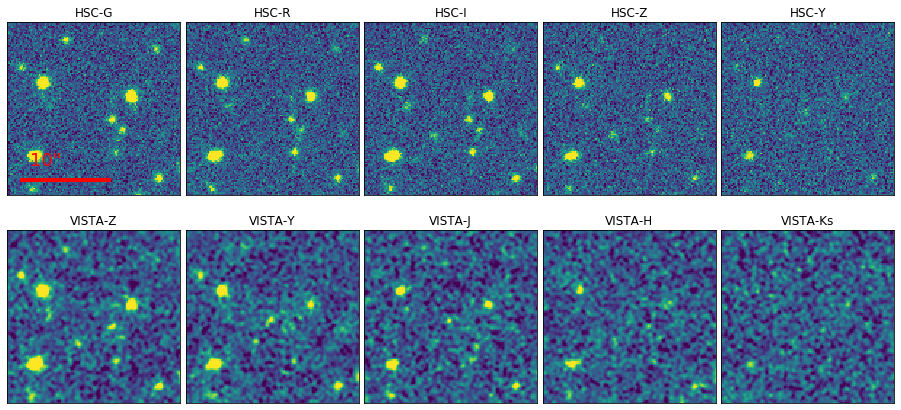

02:18:11.50 -05:00:59.4 0.6029748955379575 -0.08755444192629554 8523 2,5


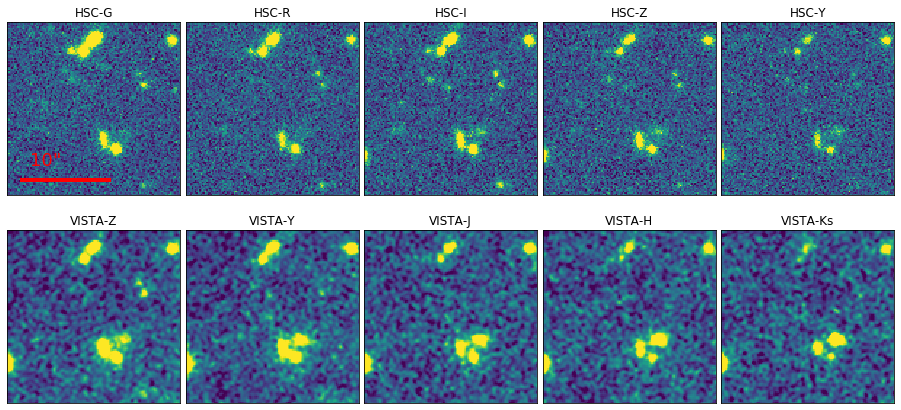

02:17:57.58 -05:08:44.8 0.6019626045718008 -0.08981076479817933 8523 3,4


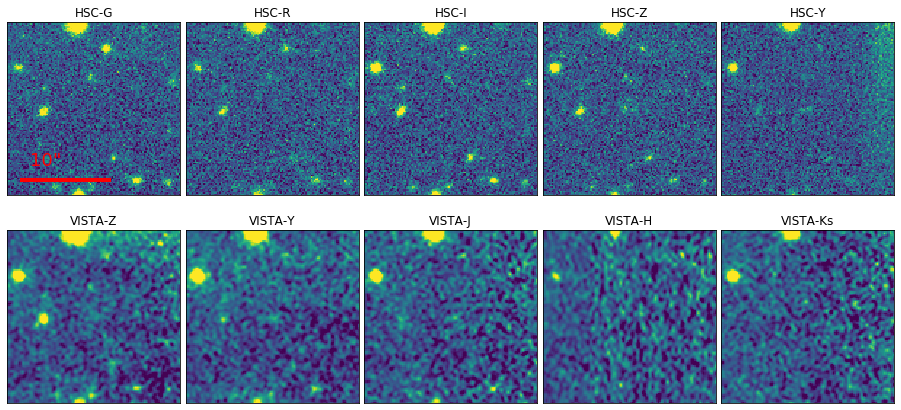

In [248]:
dim = [5,2]
width_as =20.
origin = "lower"
sex='{} {}'.format(cands[0][1],cands[0][2])
c=SkyCoord(sex, unit=(u.hourangle, u.deg))
ra,dec= c.ra.degree,c.dec.degree
test = rd_fits('./data/highz/calexp-HSC-R-8523-1,3.fits',
                    ra,
                    dec,
                    hdrNum=1,
                    pixelscale= Angle(0.168*u.arcsec ).arcsec, #Whatis pixelscale
                    width_as=width_as
                    )

for cand in cands:
    cand_id=cand[0]
    sex='{} {}'.format(cand[1],cand[2])
    c=SkyCoord(sex, unit=(u.hourangle, u.deg))
    #cand_id=cand['id']
    #c=SkyCoord(cand['ra'],cand['dec'], unit= u.deg)
    ra,dec= c.ra.degree,c.dec.degree

    patchInfo=sm.findTractPatchList(
            [lsst.geom.SpherePoint(c.ra.degree*lsst.geom.degrees, c.dec.degree*lsst.geom.degrees)]
            )
    tract=patchInfo[0][0].getId()
    patch="{},{}".format(patchInfo[0][1][0].getIndex()[0],patchInfo[0][1][0].getIndex()[1])
    print(cand_id,c.ra.radian,c.dec.radian, tract,patch)
    




    fig, axes = plt.subplots(dim[1], dim[0])
    #gs = gridspec.GridSpec(2, 5)
    #gs.update( wspace = 0.0, hspace = 0.1) 

    def plot_image(ax, im, name):
        #ax = fig.add_subplot(gs)
        vscale = cutout_scale(im)
        ax.imshow(im,  
                  vmin=vscale[0],#np.min(im), 
                  vmax=vscale[1], 
                  #cmap="binary", 
                  interpolation='nearest', 
                  #extent=[0,im[0][0].shape[0],0,im[0][0].shape[1]],
                  #aspect=100,
                  origin=origin)
        #ax.axis('equal')
        #ax.set_aspect('auto')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        #ax.text(0.1, 0.7, band, fontsize = 18, color = 'blue')
        ax.set_title(name)


    im_size = test.data.shape[0]
    fiducial = 10 #arcsec
    axes[0,0].plot([10, 10 + (fiducial/width_as)*im_size], [ 10, 10], c='red', lw=4)
    axes[0,0].text(15, 20, '{}"'.format(fiducial), fontsize = 18, color = 'red')





    n=0

    for band in all_bands:
        #print(band)

        im = rd_fits('./data/highz/calexp-{}-{}-{}.fits'.format(band,tract,patch),
                        ra,
                        dec,
                        hdrNum=1,
                        pixelscale= Angle(0.168*u.arcsec ).arcsec, #Whatis pixelscale
                        width_as=width_as
                        )
        x, y = np.floor_divide(n, dim[0]), np.remainder(n, dim[0])
        plot_image(axes[x,y], im.data, band)
        n+=1
    #gs.update( wspace = 0.1, hspace = 0.2) 
    #fig.subplots_adjust( wspace = 0.1, hspace = 0.2)

    #fig.suptitle('HDFN cutouts ({:.0f}"x{:.0f}") \n ra: {:.4f}, dec: {:.4f} (J{})'.format(width_as, width_as,\
    #       ra, dec, radec_str), fontsize=15)

    fig.set_size_inches(16, 7)
    fig.subplots_adjust(hspace=0.2, wspace=0.0)
    
    plt.savefig('./figs/multiband_{}_{}_{}.png'.format(tract,patch,cand_id), bbox='tight')
    plt.savefig('./figs/multiband_{}_{}_{}.pdf'.format(tract,patch,cand_id), bbox='tight')
    plt.show()

02:19:09.49 -05:23:20.6 0.607192047343089 -0.09405676301733665 8523 1,3


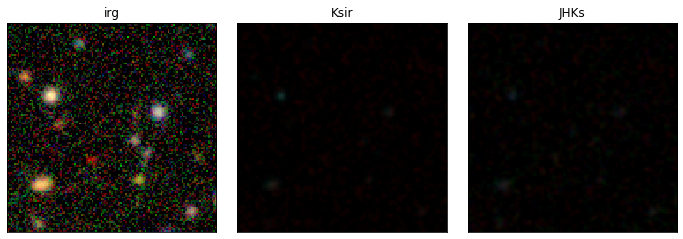

02:18:11.50 -05:00:59.4 0.6029748955379575 -0.08755444192629554 8523 2,5


<Figure size 432x288 with 0 Axes>

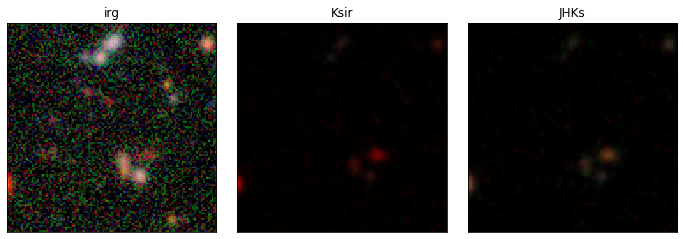

02:17:57.58 -05:08:44.8 0.6019626045718008 -0.08981076479817933 8523 3,4


<Figure size 432x288 with 0 Axes>

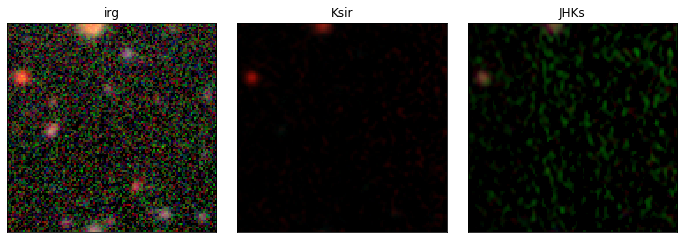

<Figure size 432x288 with 0 Axes>

In [194]:
dim = [3,1]
width_as =20.
origin = "lower"
sex='{} {}'.format(cands[0][1],cands[0][2])
c=SkyCoord(sex, unit=(u.hourangle, u.deg))
ra,dec= c.ra.degree,c.dec.degree
test = rd_fits('./data/highz/calexp-HSC-R-8523-1,3.fits',
                    ra,
                    dec,
                    hdrNum=1,
                    pixelscale= Angle(0.168*u.arcsec ).arcsec, #Whatis pixelscale
                    width_as=width_as
                    )


for c_num,cand in enumerate(cands):
    fig, axes = plt.subplots(dim[1], dim[0])
    sex='{} {}'.format(cand[1],cand[2])
    c=SkyCoord(sex, unit=(u.hourangle, u.deg))
    ra,dec= c.ra.degree,c.dec.degree

    patchInfo=sm.findTractPatchList(
            [lsst.geom.SpherePoint(c.ra.degree*lsst.geom.degrees, c.dec.degree*lsst.geom.degrees)]
            )
    tract=patchInfo[0][0].getId()
    patch="{},{}".format(patchInfo[0][1][0].getIndex()[0],patchInfo[0][1][0].getIndex()[1])
    print(sex,c.ra.radian,c.dec.radian, tract,patch)


    n=0
    im_dict={}
    for band in all_bands:
        #print(band)

        im_dict[band]= rd_fits('./data/highz/calexp-{}-{}-{}.fits'.format(band,tract,patch),
                        ra,
                        dec,
                        hdrNum=1,
                        pixelscale= Angle(0.168*u.arcsec ).arcsec, #Whatis pixelscale
                        width_as=width_as
                        )
 

        n+=1
    #gs.update( wspace = 0.1, hspace = 0.2) 
    #fig.subplots_adjust( wspace = 0.1, hspace = 0.2)

    #fig.suptitle('HDFN cutouts ({:.0f}"x{:.0f}") \n ra: {:.4f}, dec: {:.4f} (J{})'.format(width_as, width_as,\
    #       ra, dec, radec_str), fontsize=15)

    irg_default = make_lupton_rgb(
        im_dict['HSC-I'].data, im_dict['HSC-R'].data,  im_dict['HSC-G'].data, 
        Q=5, stretch=0.1,
        filename="./figs/{}_{}_gri.jpeg".format(tract,patch))
    kir_default = make_lupton_rgb(
        im_dict['VISTA-Ks'].data, im_dict['HSC-I'].data, im_dict['HSC-R'].data, 
        #Q=5, stretch=0.1,
        filename="./figs/{}_{}_gri.jpeg".format(tract,patch))
    khj_default = make_lupton_rgb(
        im_dict['VISTA-Ks'].data, im_dict['VISTA-H'].data,  im_dict['VISTA-J'].data, 
        #Q=5, stretch=0.1,
        filename="./figs/{}_{}_gri.jpeg".format(tract,patch))
    axes[0].imshow(irg_default, origin='lower')
    axes[0].axes.get_xaxis().set_visible(False)
    axes[0].axes.get_yaxis().set_visible(False)
    axes[0].set_title('irg')
    axes[1].imshow(kir_default, origin='lower')
    axes[1].axes.get_xaxis().set_visible(False)
    axes[1].axes.get_yaxis().set_visible(False)
    axes[1].set_title('Ksir')
    axes[2].imshow(khj_default, origin='lower')
    axes[2].axes.get_xaxis().set_visible(False)
    axes[2].axes.get_yaxis().set_visible(False)
    axes[2].set_title('JHKs')
    fig.set_size_inches(12, 6)
    fig.subplots_adjust(hspace=0.2, wspace=0.1)
    plt.show()
    plt.savefig('./figs/multiband_images_{}_{}.png'.format(tract,patch), bbox='tight')
    plt.savefig('./figs/multiband_images_{}_{}.pdf'.format(tract,patch), bbox='tight')

In [164]:
c_num

2

In [138]:
im_dict['HSC-G'].data

array([[-0.0055271 , -0.0315241 , -0.00298752, ...,  0.00856623,
         0.00191584,  0.00855614],
       [-0.00618789, -0.01808063,  0.01310466, ...,  0.00228697,
        -0.01000022,  0.00980286],
       [-0.00889028, -0.01122156, -0.02548128, ..., -0.00313521,
         0.00675362, -0.01989565],
       ...,
       [-0.01543609,  0.01856624,  0.01624916, ...,  0.00812379,
         0.01797897,  0.00295455],
       [ 0.00062787,  0.01024975,  0.01144035, ...,  0.02306602,
         0.02709232, -0.0029527 ],
       [ 0.00630807,  0.00153432, -0.00518875, ...,  0.01390619,
         0.00551478, -0.01318053]], dtype=float32)

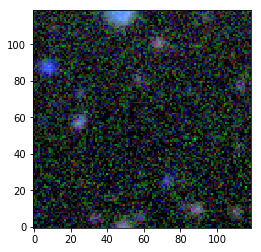

In [147]:
rgb_default = make_lupton_rgb(
        im_dict['HSC-G'].data, im_dict['HSC-R'].data, im_dict['HSC-I'].data,  
        Q=5, stretch=0.1,filename="./figs/{}_{}_gri.jpeg".format(tract,patch))
plt.imshow(rgb_default, origin='lower')

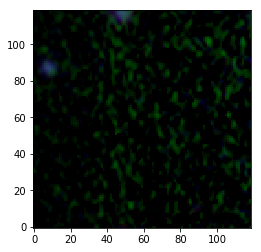

In [151]:
rgb_default = make_lupton_rgb(
        im_dict['VISTA-J'].data, im_dict['VISTA-H'].data, im_dict['VISTA-Ks'].data,  
        #Q=10, stretch=0.5,
    filename="./figs/{}_{}_gri.jpeg".format(tract,patch))
plt.imshow(rgb_default, origin='lower')

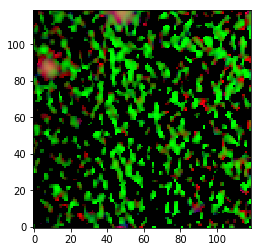

In [198]:
rgb_default = make_lupton_rgb(
         im_dict['VISTA-Ks'].data,im_dict['VISTA-H'].data, im_dict['VISTA-J'].data,  
       Q=10, stretch=0.5,
    filename="./figs/{}_{}_gri.jpeg".format(tract,patch))
plt.imshow(rgb_default, origin='lower')

In [230]:
match=Table.read('./data/highz_match.fits')

In [231]:
match

id_1,VISTA-Z_m_merge_peak_sky,VISTA-Z_m_detect_isPrimary,VISTA-Z_m_base_PsfFlux_flag,VISTA-Z_m_base_ClassificationExtendedness_value,VISTA-Z_f_base_PsfFlux_magErr,VISTA-Z_f_base_PsfFlux_mag,VISTA-Z_f_base_CircularApertureFlux_9_0_magErr,VISTA-Z_f_base_CircularApertureFlux_9_0_mag,VISTA-Z_f_base_CircularApertureFlux_6_0_magErr,VISTA-Z_f_base_CircularApertureFlux_6_0_mag,VISTA-Z_f_base_CircularApertureFlux_17_0_magErr,VISTA-Z_f_base_CircularApertureFlux_17_0_mag,VISTA-Z_f_base_CircularApertureFlux_12_0_magErr,VISTA-Z_f_base_CircularApertureFlux_12_0_mag,VISTA-Y_m_merge_peak_sky,VISTA-Y_m_detect_isPrimary,VISTA-Y_m_base_PsfFlux_flag,VISTA-Y_m_base_ClassificationExtendedness_value,VISTA-Y_f_base_PsfFlux_magErr,VISTA-Y_f_base_PsfFlux_mag,VISTA-Y_f_base_CircularApertureFlux_9_0_magErr,VISTA-Y_f_base_CircularApertureFlux_9_0_mag,VISTA-Y_f_base_CircularApertureFlux_6_0_magErr,VISTA-Y_f_base_CircularApertureFlux_6_0_mag,VISTA-Y_f_base_CircularApertureFlux_17_0_magErr,VISTA-Y_f_base_CircularApertureFlux_17_0_mag,VISTA-Y_f_base_CircularApertureFlux_12_0_magErr,VISTA-Y_f_base_CircularApertureFlux_12_0_mag,VISTA-Ks_m_merge_peak_sky,VISTA-Ks_m_detect_isTractInner,VISTA-Ks_m_detect_isPrimary,VISTA-Ks_m_detect_isPatchInner,VISTA-Ks_m_base_PsfFlux_flag,VISTA-Ks_m_base_ClassificationExtendedness_value,VISTA-Ks_f_coord_ra,VISTA-Ks_f_coord_dec,VISTA-Ks_f_base_PsfFlux_magErr,VISTA-Ks_f_base_PsfFlux_mag,VISTA-Ks_f_base_CircularApertureFlux_9_0_magErr,VISTA-Ks_f_base_CircularApertureFlux_9_0_mag,VISTA-Ks_f_base_CircularApertureFlux_6_0_magErr,VISTA-Ks_f_base_CircularApertureFlux_6_0_mag,VISTA-Ks_f_base_CircularApertureFlux_17_0_magErr,VISTA-Ks_f_base_CircularApertureFlux_17_0_mag,VISTA-Ks_f_base_CircularApertureFlux_12_0_magErr,VISTA-Ks_f_base_CircularApertureFlux_12_0_mag,VISTA-J_m_merge_peak_sky,VISTA-J_m_detect_isPrimary,VISTA-J_m_base_PsfFlux_flag,VISTA-J_m_base_ClassificationExtendedness_value,VISTA-J_f_base_PsfFlux_magErr,VISTA-J_f_base_PsfFlux_mag,VISTA-J_f_base_CircularApertureFlux_9_0_magErr,VISTA-J_f_base_CircularApertureFlux_9_0_mag,VISTA-J_f_base_CircularApertureFlux_6_0_magErr,VISTA-J_f_base_CircularApertureFlux_6_0_mag,VISTA-J_f_base_CircularApertureFlux_17_0_magErr,VISTA-J_f_base_CircularApertureFlux_17_0_mag,VISTA-J_f_base_CircularApertureFlux_12_0_magErr,VISTA-J_f_base_CircularApertureFlux_12_0_mag,VISTA-H_m_merge_peak_sky,VISTA-H_m_detect_isPrimary,VISTA-H_m_base_PsfFlux_flag,VISTA-H_m_base_ClassificationExtendedness_value,VISTA-H_f_base_PsfFlux_magErr,VISTA-H_f_base_PsfFlux_mag,VISTA-H_f_base_CircularApertureFlux_9_0_magErr,VISTA-H_f_base_CircularApertureFlux_9_0_mag,VISTA-H_f_base_CircularApertureFlux_6_0_magErr,VISTA-H_f_base_CircularApertureFlux_6_0_mag,VISTA-H_f_base_CircularApertureFlux_17_0_magErr,VISTA-H_f_base_CircularApertureFlux_17_0_mag,VISTA-H_f_base_CircularApertureFlux_12_0_magErr,VISTA-H_f_base_CircularApertureFlux_12_0_mag,HSC-Z_m_merge_peak_sky,HSC-Z_m_detect_isPrimary,HSC-Z_m_base_PsfFlux_flag,HSC-Z_m_base_ClassificationExtendedness_value,HSC-Z_f_base_PsfFlux_magErr,HSC-Z_f_base_PsfFlux_mag,HSC-Z_f_base_CircularApertureFlux_9_0_magErr,HSC-Z_f_base_CircularApertureFlux_9_0_mag,HSC-Z_f_base_CircularApertureFlux_6_0_magErr,HSC-Z_f_base_CircularApertureFlux_6_0_mag,HSC-Z_f_base_CircularApertureFlux_17_0_magErr,HSC-Z_f_base_CircularApertureFlux_17_0_mag,HSC-Z_f_base_CircularApertureFlux_12_0_magErr,HSC-Z_f_base_CircularApertureFlux_12_0_mag,HSC-R_m_merge_peak_sky,HSC-R_m_detect_isPrimary,HSC-R_m_base_PsfFlux_flag,HSC-R_m_base_ClassificationExtendedness_value,HSC-R_f_base_PsfFlux_magErr,HSC-R_f_base_PsfFlux_mag,HSC-R_f_base_CircularApertureFlux_9_0_magErr,HSC-R_f_base_CircularApertureFlux_9_0_mag,HSC-R_f_base_CircularApertureFlux_6_0_magErr,HSC-R_f_base_CircularApertureFlux_6_0_mag,HSC-R_f_base_CircularApertureFlux_17_0_magErr,HSC-R_f_base_CircularApertureFlux_17_0_mag,HSC-R_f_base_CircularApertureFlux_12_0_magErr,HSC-R_f_base_CircularApertureFlux_12_0_mag,HSC-I_m_merge_peak_sky,HSC-I_m_detect_isPrimary,HSC-I_m_base_Ps

In [240]:
pos = [
       4866.,     #g  (GPC1)
       6215.,     #r  (GPC1)
       7545.,     #i  (GPC1)
       8680.,     #z  (GPC1)
       9633.,     #y  (GPC1)
     8680.,     #z  (GPC1)
       9633.,     #y  (GPC1)
       12510.,    #J  (UKIRT)
       16377.,    #H  (UKIRT)
  
       21496.,    #Ks (WIRCam)

      ]   
#convert pos to nm
for n in np.arange(len(pos)):
    pos[n] = pos[n]/10
pos=np.array(pos)

In [241]:
mags = np.array([match['{}_f_base_CircularApertureFlux_6_0_mag'.format(b)].data for b in all_bands])

In [242]:
mags

array([[27.06847951],
       [27.62921507],
       [28.73147769],
       [26.97104634],
       [25.87920284],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [25.22389698]])

Text(0.5, 0, 'nm')

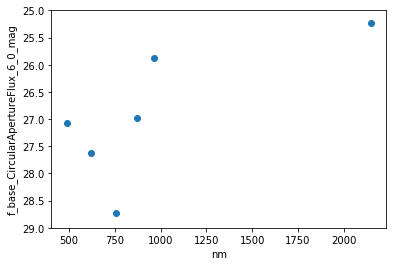

In [245]:
plt.scatter(pos,mags)
plt.ylim([29,25])
plt.ylabel('f_base_CircularApertureFlux_6_0_mag')
plt.xlabel('nm')